# Data preparation and exploration

In [47]:
# Import external libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# import local
from data_preparation import (modifyData, changeToDummies, 
                        columns_to_boolean, printUniqueValues)

In [48]:
# Get data to data frame
df = pd.read_csv("Banking Prediction Sample 1 - Dataset.csv", index_col = 'Customer_ID')

# Get first 5 row
print(f"First 5 rows:\n {df.head()}")

First 5 rows:
             Gender  Age  Tenure  Saving_Amount  Current_Amount  \
Customer_ID                                                      
1                M   52      49       0.000000        0.000000   
2                F   59      49       0.000000        0.000000   
3                M   52      49      18.825714        0.000000   
4                M   54      49       0.000000      603.791429   
5                F   61      49       0.000000        0.000000   

             Time_Deposits_Amount  Funds_Amount  Stocks_Amount  \
Customer_ID                                                      
1                             0.0           0.0            0.0   
2                             0.0           0.0            0.0   
3                             0.0           0.0            0.0   
4                             0.0           0.0            0.0   
5                             0.0           0.0            0.0   

             Bank_Assurance_Amount  Life_Assurance_Amount  

In [49]:
# Describe data
described_data = df.describe().transpose()
print(f"Described data:\n {described_data}")

Described data:
                           count         mean           std   min   25%    50%  \
Age                    104733.0    45.285803     15.540300  18.0  33.0  43.00   
Tenure                 104733.0    53.938453     30.054760   0.0  33.0  55.00   
Saving_Amount          104733.0  1609.799590   7694.181205   0.0   0.0  21.19   
Current_Amount         104733.0   323.738039   2337.215922   0.0   0.0   0.00   
Time_Deposits_Amount   104733.0  1548.830453  21784.476797   0.0   0.0   0.00   
Funds_Amount           104733.0   967.336721   8716.537607   0.0   0.0   0.00   
Stocks_Amount          104733.0   617.910387  15906.599559   0.0   0.0   0.00   
Bank_Assurance_Amount  104733.0     9.542685     70.467561   0.0   0.0   0.00   
Life_Assurance_Amount  104733.0     2.744323     34.522766   0.0   0.0   0.00   
Business_Loan_Amount   104733.0   391.255315   5032.130272   0.0   0.0   0.00   
Home_Loan_Amount       104733.0  1271.831169   9310.062040   0.0   0.0   0.00   
Consumer_Lo

In [50]:
info = df.info()
print(f"Data frame informaton: {info}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104733 entries, 1 to 104733
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 104733 non-null  object 
 1   Age                    104733 non-null  int64  
 2   Tenure                 104733 non-null  int64  
 3   Saving_Amount          104733 non-null  float64
 4   Current_Amount         104733 non-null  float64
 5   Time_Deposits_Amount   104733 non-null  float64
 6   Funds_Amount           104733 non-null  float64
 7   Stocks_Amount          104733 non-null  float64
 8   Bank_Assurance_Amount  104733 non-null  float64
 9   Life_Assurance_Amount  104733 non-null  float64
 10  Business_Loan_Amount   104733 non-null  float64
 11  Home_Loan_Amount       104733 non-null  float64
 12  Consumer_Loan_Amount   104733 non-null  float64
 13  Branch_Transactions    104733 non-null  int64  
 14  ATM_Transactions       104733 non-nu

In [51]:
# Unique values
printUniqueValues(df)

Unique values
The number of values for feature Gender: 2 -- ['F' 'M']
The number of values for feature Age: 73
The number of values for feature Tenure: 174
The number of values for feature Saving_Amount: 58918
The number of values for feature Current_Amount: 22366
The number of values for feature Time_Deposits_Amount: 3444
The number of values for feature Funds_Amount: 5064
The number of values for feature Stocks_Amount: 7173
The number of values for feature Bank_Assurance_Amount: 3667
The number of values for feature Life_Assurance_Amount: 814
The number of values for feature Business_Loan_Amount: 2462
The number of values for feature Home_Loan_Amount: 4072
The number of values for feature Consumer_Loan_Amount: 23907
The number of values for feature Branch_Transactions: 144
The number of values for feature ATM_Transactions: 95
The number of values for feature Phone_Transactions: 21
The number of values for feature Internet_Transactions: 16
The number of values for feature Standing_Ord

In [52]:
# Check if there are any null values
null_values = df.isnull().sum()
print(f"Number of null values per column:\n {null_values}")

Number of null values per column:
 Gender                   0
Age                      0
Tenure                   0
Saving_Amount            0
Current_Amount           0
Time_Deposits_Amount     0
Funds_Amount             0
Stocks_Amount            0
Bank_Assurance_Amount    0
Life_Assurance_Amount    0
Business_Loan_Amount     0
Home_Loan_Amount         0
Consumer_Loan_Amount     0
Branch_Transactions      0
ATM_Transactions         0
Phone_Transactions       0
Internet_Transactions    0
Standing_Orders          0
New_Credit_Card_Flag     0
dtype: int64


In [53]:
# Check values
df['New_Credit_Card_Flag'].value_counts()

0    98933
1     5800
Name: New_Credit_Card_Flag, dtype: int64

## Data preparation for training

In [54]:
# Get new data frame with modified data
# For more info see data_manipulation.py
df_new = modifyData(df)

Checking values for each component


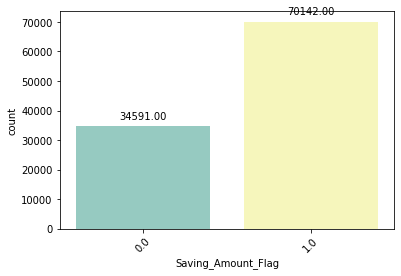

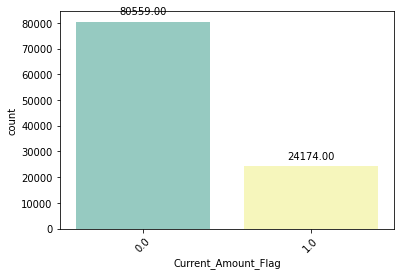

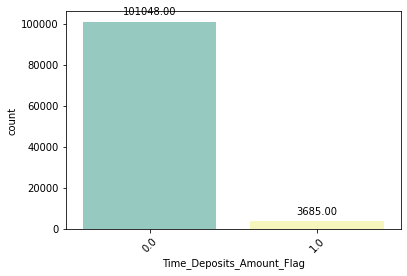

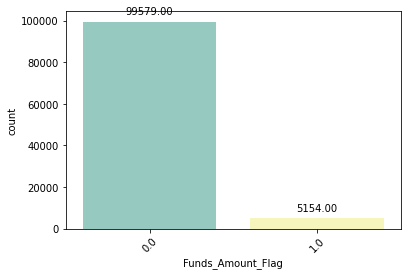

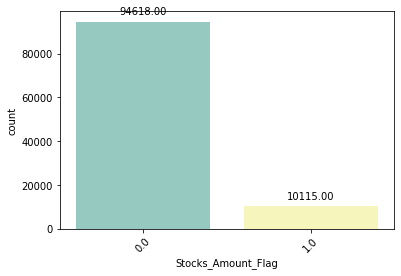

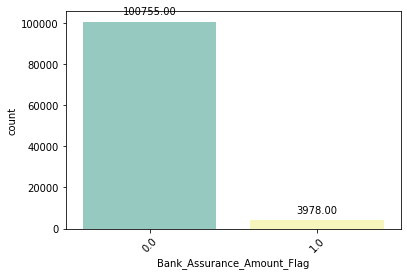

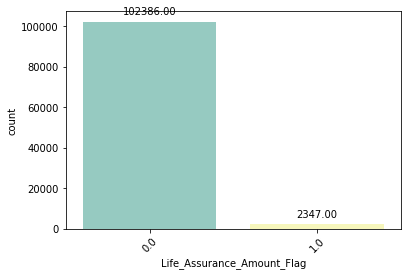

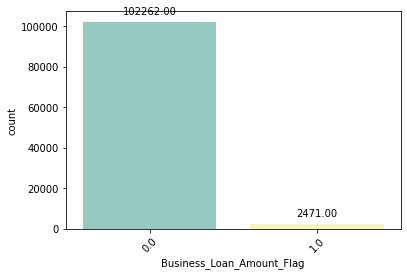

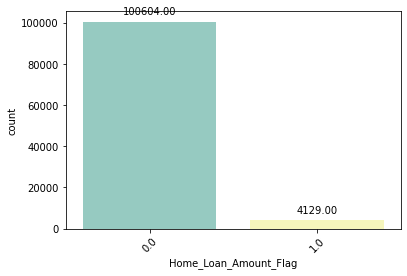

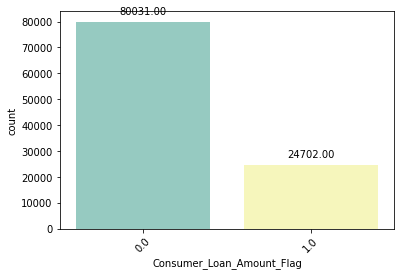

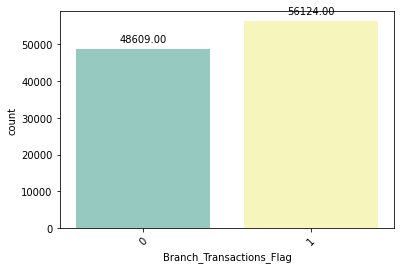

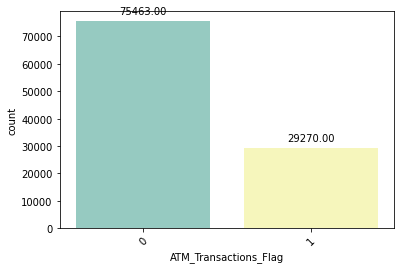

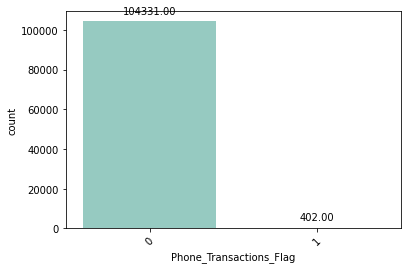

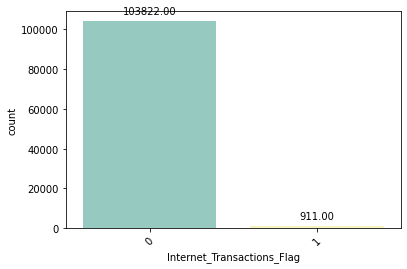

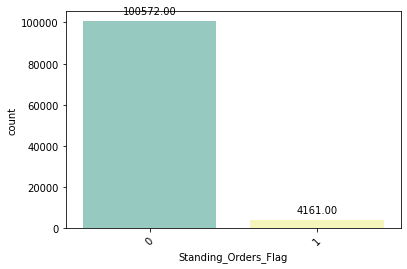

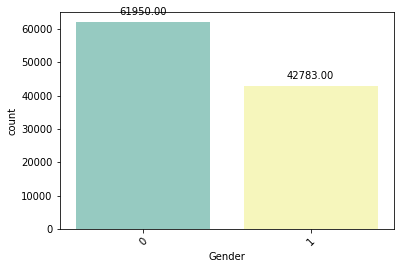

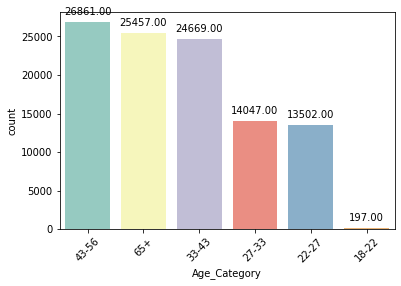

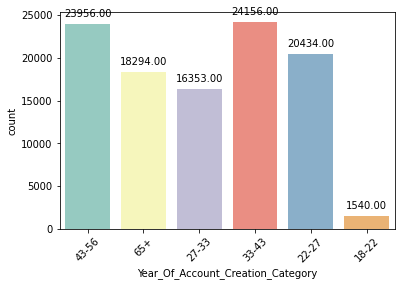

In [55]:
features = [f"{column}_Flag" for column in columns_to_boolean]
features.extend(["Gender", "Age_Category", "Year_Of_Account_Creation_Category"])

print("Checking values for each component")

for feature in features:
    splot = sns.countplot(x=feature, data=df_new, palette="Set3")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    plt.xticks(rotation=45)
    plt.show()

In [56]:
df_new = changeToDummies(df_new)

# Get correlation matrix
correlation_matrix = df_new.corrwith(df['New_Credit_Card_Flag'])
print(f"Correlation matrix:\n {correlation_matrix}")

Correlation matrix:
 Gender                                    -0.011998
Age                                       -0.043864
Tenure                                     0.028626
Saving_Amount_Flag                        -0.112052
Current_Amount_Flag                       -0.015033
Time_Deposits_Amount_Flag                 -0.028791
Funds_Amount_Flag                         -0.024785
Stocks_Amount_Flag                        -0.028005
Bank_Assurance_Amount_Flag                 0.015441
Life_Assurance_Amount_Flag                 0.051058
Business_Loan_Amount_Flag                  0.019847
Home_Loan_Amount_Flag                      0.005007
Consumer_Loan_Amount_Flag                  0.126362
Branch_Transactions_Flag                   0.116849
ATM_Transactions_Flag                      0.143364
Phone_Transactions_Flag                    0.073411
Internet_Transactions_Flag                 0.272236
Standing_Orders_Flag                       0.022349
New_Credit_Card_Flag                       

In [57]:
df_new.to_csv('PreparedData.csv', sep=';')